In [1]:
import pathlib
import os
from PIL import Image

import torch
from torchvision import models, datasets, transforms

import pandas as pd
import numpy as np


import matplotlib.pyplot as plt
import plotly.express as px

import pickle
from sklearn.decomposition import IncrementalPCA

In [2]:
# create a dataset and dataloader for the data
data_dir_train = pathlib.Path('../../data/skincancer_new_processed/train/images')
data_dir_test = pathlib.Path('../../data/skincancer_new_processed/test/images')
data_dir_val = pathlib.Path('../../data/skincancer_new_processed/val/images')

In [3]:
# read each image from the folder and convert it to a numpy array, center crop it and flatten it, add it to the dataset
def create_dataset(data_dir):
    index = []
    dataset = []
    path = data_dir
    for img in path.iterdir():
        index.append(str(img).split('/')[-1].split('.')[0])
        dataset.append(np.array(Image.open(img)).flatten().reshape(1, -1))
    return dataset, index

In [4]:
output = create_dataset(data_dir_train)

In [5]:
dataset = np.concatenate(output[0], axis=0)
index = output[1]

In [6]:
# delete output to save memory
del output

In [7]:
dataset.shape

(2000, 49152)

In [8]:
# apply PCA to the dataset
pca = IncrementalPCA(n_components=400, batch_size=500)
pca.fit(dataset)
print(pca.explained_variance_ratio_)

[4.13123454e-01 1.59989038e-01 6.51930862e-02 5.01080796e-02
 2.52115506e-02 2.36599985e-02 1.84148703e-02 1.57799743e-02
 1.35657414e-02 1.09501731e-02 1.02543553e-02 9.47503179e-03
 8.39109487e-03 7.99310733e-03 6.52541022e-03 6.27281541e-03
 5.76780767e-03 4.49275320e-03 4.30379375e-03 4.06296269e-03
 3.63383008e-03 3.41249208e-03 3.16566312e-03 3.00288945e-03
 2.73792814e-03 2.70916787e-03 2.45144073e-03 2.33476674e-03
 2.20356532e-03 2.06542451e-03 2.00004219e-03 1.89069851e-03
 1.73082053e-03 1.66375373e-03 1.60726734e-03 1.59449366e-03
 1.51253398e-03 1.41597017e-03 1.38450724e-03 1.31549906e-03
 1.26254881e-03 1.21145726e-03 1.17401541e-03 1.11738289e-03
 1.06940630e-03 1.05099000e-03 1.00248458e-03 9.93740611e-04
 9.57716580e-04 9.32072057e-04 9.11823420e-04 8.84579599e-04
 8.56991176e-04 8.31289985e-04 8.07818021e-04 7.82755599e-04
 7.48401592e-04 7.34861390e-04 6.98630769e-04 6.72554651e-04
 6.69286920e-04 6.59899205e-04 6.42958053e-04 6.30307376e-04
 6.17229083e-04 5.995729

In [9]:
print(sum(pca.explained_variance_ratio_))

0.9796989098036852


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [7..273].


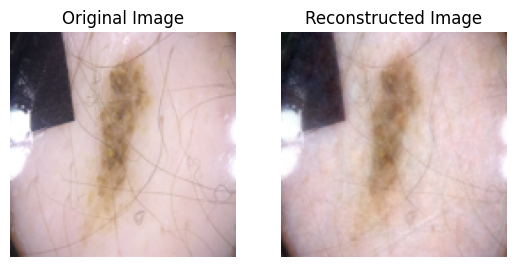

In [58]:
# confront the original image with the reconstructed image for a random image
random_index = np.random.randint(0, len(dataset))
random_image = dataset[random_index].reshape(1, -1)
reconstructed_image = pca.inverse_transform(pca.transform(random_image))

fig, ax = plt.subplots(1, 2)
ax[0].imshow(random_image.reshape(128, 128, 3))
ax[0].set_title('Original Image')
ax[0].axis('off')
reconstructed_image_int = reconstructed_image.astype(int)
ax[1].imshow(reconstructed_image_int.reshape(128, 128, 3))
ax[1].set_title('Reconstructed Image')
ax[1].axis('off')
plt.show()

In [11]:
## save the pca model to a file
#with open('pca.pkl', 'wb') as f:
#    pickle.dump(pca, f)

In [18]:
train = pca.transform(dataset)
df_train = pd.DataFrame(train, index=index)
df_train.index = [ind+"_train" for ind in index]
df_train

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
666_benign_train,-319.387866,-417.589250,4530.513977,1587.812063,1724.613794,-836.265050,295.739737,4804.498124,-223.019630,-884.570469,...,-235.482328,-346.888501,-2.202963,-527.121643,-604.879421,-232.817520,-172.143389,-194.769381,-138.814817,214.659891
470_benign_train,3786.186871,7385.170320,-3423.374947,244.308580,-1237.968229,-641.818517,-6559.241272,-2172.843429,-71.508032,1424.216097,...,-1832.688215,-1147.440420,960.988836,1024.001084,985.578526,717.296412,111.221696,246.094942,459.125071,359.366255
1202_benign_train,1775.743097,-13197.367974,-315.281618,-2094.339135,-1365.167897,355.095235,1224.650013,1096.577469,-1675.182939,-1126.957577,...,71.713504,1596.150241,-816.822696,-4942.641970,1688.245246,990.559684,1335.109207,725.536428,1628.957493,-381.065329
1459_benign_train,1809.608105,8722.743196,1102.701736,-530.729117,-7573.707934,2186.368496,24.003336,-1885.511161,1357.574140,528.729628,...,699.068939,1726.878468,187.216435,107.687678,870.637589,-372.794292,-469.972698,-597.000455,-131.268854,75.211831
1333_benign_train,-284.255610,3422.974215,4944.635126,-3024.625020,406.108330,-2730.408195,-962.190251,844.318764,-3214.764537,462.795686,...,-331.891470,-53.540276,-87.874444,1513.821601,-211.438040,411.418638,659.894729,376.454372,-266.999270,-383.643699
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
931_malignant_train,15048.262105,-3486.499095,-4523.064804,-1917.063302,563.111557,-811.493906,69.207960,4955.113346,-1146.926414,3249.838483,...,-343.786781,734.537678,729.498036,-482.508675,1047.611907,-847.478485,626.252040,-192.685402,364.304382,575.684121
86_malignant_train,19654.231934,-2400.977333,770.322474,-1308.765088,-763.000060,304.827885,22.257187,-2913.819852,1993.127968,2616.695575,...,316.926830,645.059006,865.266885,-810.991437,-38.891163,16.713776,-305.372573,-979.935952,-1122.071351,335.086426
904_malignant_train,-4607.591585,-4609.970209,-2277.840356,566.724144,2031.172192,2697.108441,-3320.172840,1187.728646,-706.789147,1016.015172,...,-958.514566,-1216.060846,-744.147924,-157.234682,-223.151643,103.474516,-933.654595,1240.385843,-625.034950,-31.006149
224_malignant_train,16014.270872,-2683.225868,-142.451798,-1093.745533,3680.334483,1824.080594,288.183350,-2551.887223,-2450.159063,-2235.294898,...,227.867422,47.949713,481.915880,167.413603,918.142602,448.822613,-139.240465,1514.817388,1305.536416,416.579857


In [19]:
df_train.to_csv('train_pca_new_skincancer.csv')

In [20]:
del df_train

In [22]:
# create a dataset for the test data
output = create_dataset(data_dir_test)

In [23]:
dataset = np.concatenate(output[0], axis=0)
index = output[1]

In [24]:
test = pca.transform(dataset)
df_test = pd.DataFrame(test, index=index)
df_test.index = [ind+"_test" for ind in index]
df_test.to_csv('test_pca.csv')
df_test

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
10_benign_test,14518.828116,7484.159787,-821.410063,-1343.709384,-2965.039673,4293.889904,162.802450,1610.972493,-1404.613879,-901.903055,...,1705.686708,-129.545360,-93.208659,599.958152,439.747517,-240.223104,-1011.755914,390.483277,1419.554904,422.963100
1514_benign_test,2277.307359,-14969.962262,4065.382866,-1281.912103,1917.165418,-2298.087612,-2494.165045,-4517.989118,2241.159014,-899.711370,...,-620.724926,3.831612,-1861.850076,887.645853,-665.238148,-527.089907,49.556771,766.561554,-585.199445,1032.862457
259_benign_test,9579.868718,2100.306104,5681.122828,-2867.913088,7285.893759,42.814445,-151.499183,1803.462478,-2193.419842,-1934.453153,...,-1217.298280,363.262929,1073.232925,1303.932369,249.792976,690.648728,-31.147333,86.311726,-617.531611,375.389542
356_benign_test,2866.118231,6954.408421,2413.593912,-2830.564907,-3677.652049,821.347395,-2653.230510,1188.613964,-972.566290,-817.121764,...,-31.401376,-712.320986,138.852440,806.209670,638.751567,-122.765180,-153.478510,-680.224633,-86.537746,94.299893
1003_benign_test,-7493.045532,7560.354098,1703.214329,-2760.439174,3457.310776,-1402.523778,5241.695863,3620.930723,-736.702260,-481.866982,...,-1090.303424,-780.732931,694.275538,-566.501704,-1938.199361,-213.480367,204.773600,-1573.589715,-415.346549,-859.762783
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
575_malignant_test,-6653.468555,-5816.909416,-526.984193,1350.333972,610.955941,1265.055327,1505.556041,-1089.159698,-636.303670,731.738009,...,-41.843021,28.148391,53.748310,-443.591175,255.697960,419.528689,-132.349219,409.886759,439.195142,-171.637824
1135_malignant_test,-1911.109480,-4820.806313,-3580.463302,-99.063239,52.352107,-21.377080,-2262.523435,562.873904,758.100812,182.553585,...,11.020739,-320.376441,85.412730,-800.442409,213.597255,-660.689582,370.774168,-44.876209,532.602832,216.319886
1242_malignant_test,1170.480711,-42.227052,-3991.923471,-1593.324925,-1110.623937,-1557.456811,1185.617690,-1615.561227,68.362055,-1196.432534,...,146.420604,1462.009296,-845.095646,133.021067,-946.240763,-400.776453,-821.975218,686.276523,-832.587928,-636.826677
208_malignant_test,23731.649670,-5428.616782,2092.066472,2488.241167,2593.026762,2042.090854,1641.148442,-4840.876427,220.044885,956.835131,...,-73.363446,6.887056,216.720236,-328.131338,-27.793234,967.924682,-819.694798,-745.594182,-218.182999,556.813631


In [25]:
del df_test

In [26]:
# create a dataset for the validation data
output = create_dataset(data_dir_val)

In [27]:
dataset = np.concatenate(output[0], axis=0)
index = output[1]
del output

In [28]:
val = pca.transform(dataset)
df_val = pd.DataFrame(val, index=index)
df_val.index = [ind+"_val" for ind in index]
df_val.to_csv('val_pca.csv')
df_val

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
1611_benign_val,230.973342,10266.599525,-65.214103,-4074.784303,-4469.022512,2874.000051,-2742.590927,-1025.529598,878.410805,26.624695,...,324.198840,-590.756995,-665.391812,-162.787481,839.681327,-671.727507,100.171371,-934.932722,1097.902297,453.368593
1798_benign_val,14642.398484,-4724.964478,-1277.420189,1942.408509,-3368.898242,670.751133,-609.671509,-4913.848079,4480.081470,909.006237,...,-689.620952,-375.408645,-1387.331714,412.349904,-575.704263,-743.369264,-528.135318,708.507300,-54.343136,230.888364
1710_benign_val,-5576.499800,-7063.259275,349.255575,331.992142,-1318.984946,353.322283,1865.091531,-875.354915,-279.251956,1779.379783,...,-84.880928,975.637832,-103.101951,425.367087,-528.611834,-838.197896,462.677735,-763.148538,17.367908,-321.362895
1646_benign_val,3795.004319,-6585.755079,-4057.373298,-256.745271,289.420784,1017.843302,1040.667432,2.423588,-778.429190,1598.370889,...,81.729446,-319.198114,-299.360896,-385.043226,-5.809162,230.730550,-273.956402,-337.022416,-206.459489,817.714407
1773_benign_val,-12310.657757,3391.141041,5606.427870,922.040992,-4323.202912,586.005439,-4671.634993,658.538549,-460.799022,-210.023765,...,-364.474813,-916.756491,285.671929,-682.520018,-1189.010931,-468.098645,268.929167,-743.837222,-120.083874,-279.502052
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1464_malignant_val,9418.721551,11450.574873,-8125.299149,167.377896,-2546.465721,-4921.979681,8801.736675,2695.731772,2161.636145,-1106.444945,...,-1968.134148,-446.476114,279.538619,413.911552,879.203504,2040.554867,124.987197,-173.158571,-677.729621,-87.602032
1495_malignant_val,-12972.596520,-12573.228334,-5652.968281,-7469.099990,-2189.688765,-849.122992,2713.941352,-1994.007798,-1175.599828,-9977.837622,...,-3375.576253,1473.698022,1141.520156,1368.044871,-1150.841534,-2059.989976,-36.560601,-249.587288,-84.908214,1875.340799
1438_malignant_val,-390.859203,-12881.121014,-2751.043950,1218.377032,275.223450,1665.441402,-424.171878,2762.917058,206.867020,-48.749224,...,27.615022,-49.683564,473.480071,69.379654,-342.112811,-361.680253,498.243302,507.582318,159.498878,-197.295795
1382_malignant_val,443.500798,-3115.891642,-6439.029293,-3721.444653,-5003.474958,-2603.847682,393.033791,2978.329997,-108.817316,1175.783834,...,320.181450,-1563.793471,402.039888,-941.066321,1256.332848,418.255116,-233.547909,-465.015706,-210.123062,920.247005
